# Week 1: Using CNN's with the Cats vs Dogs Dataset

In [ ]:
# grader-required-cell

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Now the images are stored within the `/tmp/PetImages` directory. There is a subdirectory for each class, so one for dogs and one for cats.

In [45]:
# grader-required-cell

source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

# Deletes all non-image files (there are two .db files bundled into the dataset)
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


In [46]:
import os
import shutil

# Define root directory
root_dir = '/tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError if the function is run several times
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
    """
    Creates directories for the train and test sets

    Args:
      root_path (string) - the base directory path to create subdirectories from

    Returns:
      None
    """
    ### START CODE HERE

    # Create root directory
    os.makedirs(root_path)

    # Create subdirectories for training and validation sets
    train_dir = os.path.join(root_path, 'training')
    val_dir = os.path.join(root_path, 'validation')
    os.makedirs(train_dir)
    os.makedirs(val_dir)

    # Create subdirectories for cats and dogs in the training set
    train_cats_dir = os.path.join(train_dir, 'cats')
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    os.makedirs(train_cats_dir)
    os.makedirs(train_dogs_dir)

    # Create subdirectories for cats and dogs in the validation set
    val_cats_dir = os.path.join(val_dir, 'cats')
    val_dogs_dir = os.path.join(val_dir, 'dogs')
    os.makedirs(val_cats_dir)
    os.makedirs(val_dogs_dir)

    ### END CODE HERE


try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")


In [47]:
# grader-required-cell

# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation/cats
/tmp/cats-v-dogs/validation/dogs
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs


In [50]:
import os
import random
from shutil import copyfile

# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    """
    Splits the data into train and test sets

    Args:
        SOURCE_DIR (string): directory path containing the images
        TRAINING_DIR (string): directory path to be used for training
        VALIDATION_DIR (string): directory path to be used for validation
        SPLIT_SIZE (float): proportion of the dataset to be used for training

    Returns:
        None
    """
    # Check if the training directory exists; if not, create it
    if not os.path.exists(TRAINING_DIR):
        os.makedirs(TRAINING_DIR)

    # Check if the validation directory exists; if not, create it
    if not os.path.exists(VALIDATION_DIR):
        os.makedirs(VALIDATION_DIR)

    # Get a list of all the files in the source directory
    files = os.listdir(SOURCE_DIR)

    # Filter out zero-length files
    files = [file for file in files if os.path.getsize(os.path.join(SOURCE_DIR, file)) > 0]

    # Shuffle the files randomly
    random.shuffle(files)

    # Calculate the index to split the files
    split_index = int(SPLIT_SIZE * len(files))

    # Split the files into training and validation sets
    training_files = files[:split_index]
    validation_files = files[split_index:]

    # Copy the training files to the training directory
    for file in training_files:
        source = os.path.join(SOURCE_DIR, file)
        destination = os.path.join(TRAINING_DIR, file)
        copyfile(source, destination)

    # Copy the validation files to the validation directory
    for file in validation_files:
        source = os.path.join(SOURCE_DIR, file)
        destination = os.path.join(VALIDATION_DIR, file)
        copyfile(source, destination)

    # Print the number of files copied to each set
    print(f"Splitting data complete. {len(training_files)} files copied to {TRAINING_DIR}.")
    print(f"{len(validation_files)} files copied to {VALIDATION_DIR}.")

# Example usage
SOURCE_DIR = "/tmp/cats-v-dogs/training"
TRAINING_DIR = "/tmp/cats-v-dogs/training_data"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation_data"
SPLIT_SIZE = 0.9


#split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE)


In [51]:
# grader-required-cell

# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

Splitting data complete. 11249 files copied to /tmp/cats-v-dogs/training/cats/.
1250 files copied to /tmp/cats-v-dogs/validation/cats/.
Splitting data complete. 11249 files copied to /tmp/cats-v-dogs/training/dogs/.
1250 files copied to /tmp/cats-v-dogs/validation/dogs/.


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    """
    Creates the training and validation data generators

    Args:
        TRAINING_DIR (string): directory path containing the training images
        VALIDATION_DIR (string): directory path containing the testing/validation images

    Returns:
        train_generator, validation_generator - tuple containing the generators
    """
    ### START CODE HERE

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    train_datagen = ImageDataGenerator(rescale=1.0/255.0)

    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                  target_size=(150, 150),
                                                                  batch_size=32,
                                                                  class_mode='binary')

    ### END CODE HERE
    return train_generator, validation_generator


In [53]:
# grader-required-cell

# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [54]:
import tensorflow as tf

# GRADED FUNCTION: create_model
def create_model():
    # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
    # USE AT LEAST 3 CONVOLUTION LAYERS

    ### START CODE HERE

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    ### END CODE HERE

    return model


In [55]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
142/704 [=====>........................] - ETA: 1:03 - loss: 0.6822 - accuracy: 0.5891

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


704/704 [==============================] - 102s 128ms/step - loss: 0.5727 - accuracy: 0.6949 - val_loss: 0.4682 - val_accuracy: 0.7764
Epoch 2/15
704/704 [==============================] - 88s 124ms/step - loss: 0.4370 - accuracy: 0.7982 - val_loss: 0.4257 - val_accuracy: 0.8004
Epoch 3/15
704/704 [==============================] - 88s 125ms/step - loss: 0.3523 - accuracy: 0.8427 - val_loss: 0.3749 - val_accuracy: 0.8284
Epoch 4/15
704/704 [==============================] - 87s 123ms/step - loss: 0.2621 - accuracy: 0.8897 - val_loss: 0.3773 - val_accuracy: 0.8512
Epoch 5/15
704/704 [==============================] - 87s 123ms/step - loss: 0.1654 - accuracy: 0.9334 - val_loss: 0.4784 - val_accuracy: 0.8416
Epoch 6/15
704/704 [==============================] - 86s 123ms/step - loss: 0.0838 - accuracy: 0.9695 - val_loss: 0.5398 - val_accuracy: 0.8432
Epoch 7/15
704/704 [==============================] - 87s 124ms/step - loss: 0.0478 - accuracy: 0.9835 - val_loss: 0.6777 - val_accuracy: 0.

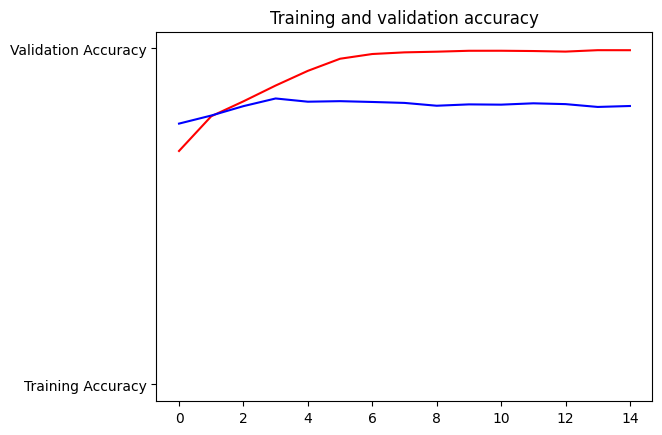

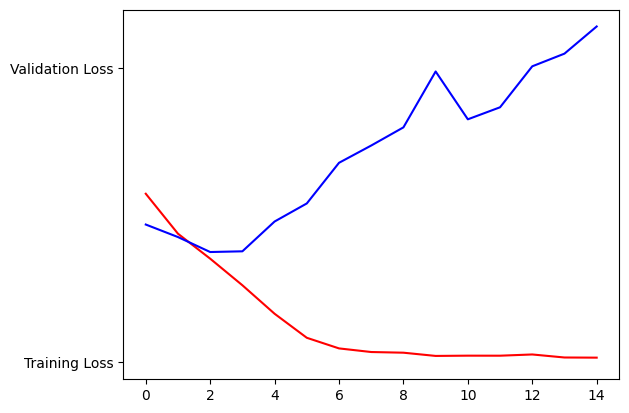

In [56]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [57]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>